# Ejercicios - Clase 7

Ejercicios de los bloques de introducción a python. Numpy 2

**Versión**: 1.0

**Fecha**: 23/10/2023

En este notebook vamos a trabajar con un dataset creado artificialmente para los ejercicios. Por ahora no debéis saber qué es Pandas, pero lo utilizaremos para leer el fichero en formato CSV, visualizarlo y luego pasarlo a Numpy, librería que sí conocemos. A fin de cuentas, leer un fichero CSV es lo mismo que gestionar una matriz de datos.

El primer dataset define las ventas de los productos de una empresa. Incluye la fecha de venta, el ID del producto, el número de productos vendidos y el precio del producto vendido.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/Ejercicios/datos/ventas_generadas.csv', index_col='Unnamed: 0')
df

,fecha,producto,productos_vendidos,precio_producto
0,2006-01-18,15,4,13.53
1,2023-05-31,2,4,3.57
2,2007-08-01,13,2,1.78
3,2013-11-17,8,3,2.11
4,2010-12-01,18,3,26.59
...,...,...,...,...
99995,2003-12-23,17,2,23.49
99996,2008-04-01,15,1,13.53
99997,2004-06-09,8,4,2.11
99998,2017-10-09,13,2,1.78


In [19]:
datos = df.to_numpy()
datos.shape

(100000, 4)

En los ejercicios de la clase anterior (Clase 6) trabajamos sobre el dataset para obtener diferente información. En esta ocasión, los ejercicios consisten en realizar un proceso de ingeniería inversa, es decir, analizar los datos para responder a la siguiente pregunta. ¿Cómo se han generado los datos?

## Ejercicio 1

Calcula la frecuencia del número de ventas para cada producto.

In [20]:
# Para calcularlo cómodamente, primero vamos a calcular qué valores pueden tomar las columnas "producto" 
# y "productos_vendidos"

# TO-DO Obtén los posibles valores que puede tener la columna "productos_vendidos"
valores_productos_vendidos = np.unique(datos[:, 2]).astype(int)
print("valores_productos:", valores_productos_vendidos)

# TO-DO Obtén los posibles valores que puede tener la columna "producto"
valores_producto = np.unique(datos[:, 1]).astype(int)
print("producto:", valores_producto)

valores_productos: [1 2 3 4]
producto: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [21]:
# Ahora que sabemos qué valores pueden tomar las columnas, vamos a definir un array (matriz)
# con shape (#Productos, #Valores_productos), es decir, (20, 4)

# TO-DO Construye la matriz inicializada a 0s con el shape correcto SIN USAR NÚMEROS MAGICOS
num_productos = len(valores_producto)
num_valores_productos = len(valores_productos_vendidos)

contadores = np.zeros((num_productos, num_valores_productos), dtype=int)
contadores.shape

(20, 4)

In [22]:
# TO-DO Rellena la variable contadores
# OPCION 1: Búsqueda por índices
time_ini = time.time()
contadores1 = np.copy(contadores)
for id_producto in valores_producto:
    indices_producto = (datos[:, 1] == id_producto)
    for i, productos_vendidos in enumerate(valores_productos_vendidos):
        indices_productos_vendidos = (datos[:, 2] == productos_vendidos)
        indices = indices_producto & indices_productos_vendidos
        contadores1[id_producto, i] = len(datos[indices])

print("OPCION 1: ", time.time() - time_ini)
        
# OPCION 2: Fila a fila
time_ini = time.time()
contadores2 = np.copy(contadores)
for fila in datos:
    id_producto = fila[1]
    productos_vendidos = fila[2]
    i_productos_vendidos = list(valores_productos_vendidos).index(productos_vendidos)
    contadores2[id_producto, i_productos_vendidos] += 1

print("OPCION 2: ", time.time() - time_ini)    

print("¿Los dos métodos dan el mismo resultado?", (contadores1 == contadores2).all(), "\n")
contadores = contadores1
print(contadores)

OPCION 1:  0.1403348445892334
OPCION 2:  0.13245439529418945
¿Los dos métodos dan el mismo resultado? True 

[[1226 1299 1197 1238]
 [1189 1246 1240 1209]
 [1307 1198 1268 1198]
 [1282 1234 1204 1222]
 [1216 1211 1300 1267]
 [1267 1253 1214 1246]
 [1212 1226 1237 1237]
 [1259 1263 1299 1285]
 [1274 1294 1256 1231]
 [1218 1261 1244 1243]
 [1268 1277 1236 1276]
 [1205 1275 1256 1227]
 [1313 1248 1210 1242]
 [1215 1247 1270 1193]
 [1249 1229 1241 1239]
 [1258 1233 1267 1238]
 [1309 1256 1224 1227]
 [1298 1242 1297 1266]
 [1277 1233 1287 1328]
 [1299 1199 1303 1273]]


**Pregunta** ¿Qué información almacena la variable contadores?

In [42]:
# Incluye tu respuesta aquí en el siguiente comentario:

"""
Si tenemos cuantas veces se vende cada producto (filas) y cuantas veces aparece un número de productos vendidos
determinado (columnas), podemos sacar mucha información de la distribución de los datos.
""";

Ahora puedes calcular la frecuencia del número de ventas de cada producto.

In [107]:
# TO-DO calcula la frecuencia de ventas de cada producto
frecuencias = contadores.sum(axis=1) / contadores.sum()
frecuencias

array([0.0496 , 0.04884, 0.04971, 0.04942, 0.04994, 0.0498 , 0.04912,
       0.05106, 0.05055, 0.04966, 0.05057, 0.04963, 0.05013, 0.04925,
       0.04958, 0.04996, 0.05016, 0.05103, 0.05125, 0.05074])

**Pregunta** ¿Qué conclusiones sacas de estas frecuencias?

In [108]:
# Incluye tu respuesta aquí en el siguiente comentario:

"""
Todos los productos tienen una frecuencia similar, por lo que han sido generados con una distribución uniforme
""";

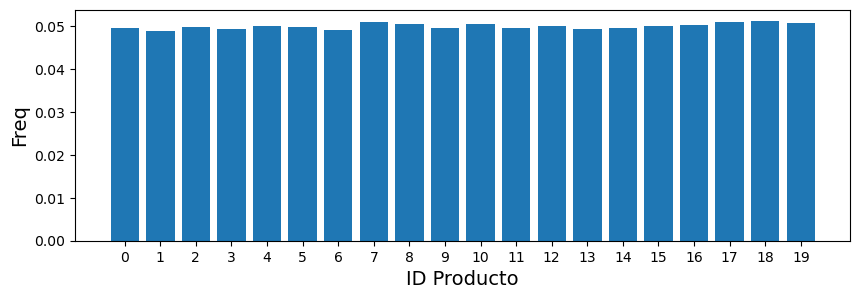

In [109]:
# Esta celda te mostrará una representación gráfica de las frecuencias para visualizarlo cómodamente
# con un diagrama de barras. Veremos más adelante cómo construir estas celdas.

plt.figure(figsize=(10, 3))
plt.bar(np.unique(datos[:, 1]), frecuencias)
plt.xticks(np.arange(20), [str(x) for x in np.unique(datos[:, 1])])
plt.xlabel("ID Producto", size=14)
plt.ylabel("Freq", size=14)
plt.show()

## Ejercicio 2

A partir de la variable ```contadores``` del ejercicio 1, calcula la frecuencia del número de productos vendidos para el producto 4.

In [110]:
id_producto = 4
# TO-DO Calcula la frecuencia de los productos vendidos para el producto 4. Es decir, la frecuencia de vender
# 1, 2, 3 o 4 productos
frecuencia_productos_vendidos_prod4 = contadores[id_producto] / contadores[id_producto].sum()
frecuencia_productos_vendidos_prod4

array([0.24349219, 0.24249099, 0.26031237, 0.25370445])

## Ejercicio 3

A partir de la variable `contadores` del ejercicio 1, calcula la frecuencia del número de productos vendidos para cada producto.

In [129]:
# TO-DO Calcula la frecuencia de los productos vendidos para todos los productos
# OPCION 1: Broadcasting
frecuencia_productos_vendidos1 = contadores / contadores.sum(axis=1, keepdims=True)

# OPCION 2: Bucle
frecuencia_productos_vendidos2 = np.zeros_like(contadores, dtype=float)
for id_producto in valores_producto:
    frecuencia_productos_vendidos2[id_producto] = contadores[id_producto] / contadores[id_producto].sum()
    
print("¿Los dos métodos dan el mismo resultado?", (frecuencia_productos_vendidos1 == frecuencia_productos_vendidos2).all(), "\n")
frecuencia_productos_vendidos = frecuencia_productos_vendidos1
print(frecuencia_productos_vendidos)

¿Los dos métodos dan el mismo resultado? True 

[[0.24717742 0.26189516 0.24133065 0.24959677]
 [0.24344799 0.25511876 0.25389025 0.247543  ]
 [0.26292496 0.24099779 0.25507946 0.24099779]
 [0.25940915 0.24969648 0.24362606 0.24726831]
 [0.24349219 0.24249099 0.26031237 0.25370445]
 [0.25441767 0.25160643 0.2437751  0.2502008 ]
 [0.24674267 0.24959283 0.25183225 0.25183225]
 [0.24657266 0.24735605 0.25440658 0.25166471]
 [0.2520277  0.25598417 0.24846686 0.24352127]
 [0.24526782 0.2539267  0.25050342 0.25030205]
 [0.25074155 0.25252126 0.24441368 0.25232351]
 [0.2427967  0.25690107 0.25307274 0.2472295 ]
 [0.26191901 0.24895272 0.24137243 0.24775583]
 [0.24670051 0.25319797 0.25786802 0.2422335 ]
 [0.2519161  0.24788221 0.25030254 0.24989915]
 [0.25180144 0.24679744 0.25360288 0.24779824]
 [0.26096491 0.25039872 0.24401914 0.24461722]
 [0.25436018 0.24338624 0.25416422 0.24808936]
 [0.24917073 0.24058537 0.25112195 0.25912195]
 [0.25601104 0.23630272 0.25679937 0.25088687]]


**Pregunta** ¿Qué conclusiones sacas de estas frecuencias?

In [134]:
# Incluye tu respuesta aquí en el siguiente comentario:

"""
Todas las ventas de producto tienen una frecuencia similar, por lo que han sido generados con una distribución 
uniforme.
""";

## Ejercicio 4

Con el análisis previo que hemos realizado, vamos a crear nuestro propio dataset (exceptuando las fechas y el precio de los productos).

In [143]:
N = 100000
n_productos = len(valores_producto)
n_ventas = len(valores_productos_vendidos)

productos = np.random.randint(n_productos, size=N)
ventas = np.random.randint(n_ventas, size=N) + 1

# Esta es una de las formas de crear un dataframe con Pandas. Os lo damos hecho.
d = {"producto": productos, "productos_vendidos": ventas}
new_dataframe = pd.DataFrame(data=d)
new_dataframe

,producto,productos_vendidos
0,3,4
1,5,3
2,1,4
3,19,3
4,5,3
...,...,...
99995,4,2
99996,16,2
99997,6,3
99998,0,3


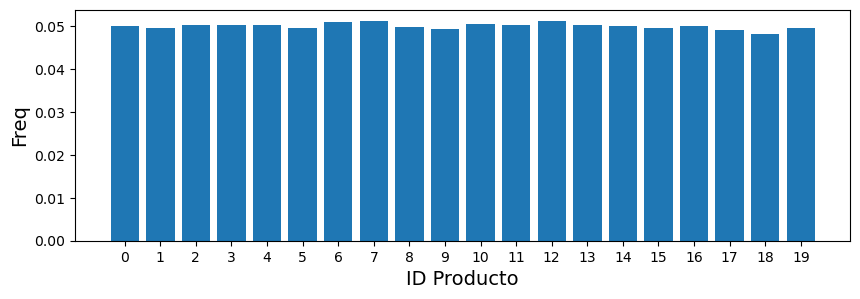

In [151]:
# Con esta celda puedes comprobar si se ha calculado correctamente. Tiene que salir de forma similar a la 
# figura del ejercicio 1.

# Esta celda te mostrará una representación gráfica de las frecuencias para visualizarlo cómodamente
# con un diagrama de barras. Veremos más adelante cómo construir estas celdas.

plt.figure(figsize=(10, 3))
plt.bar(np.unique(datos[:, 1]), (new_dataframe.groupby("producto").count() / len(new_dataframe))["productos_vendidos"])
plt.xticks(np.arange(20), [str(x) for x in np.unique(datos[:, 1])])
plt.xlabel("ID Producto", size=14)
plt.ylabel("Freq", size=14)
plt.show()